In [4]:
# 📌 Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 📌 Step 2: Load the dataset
df = pd.read_csv('IRIS.csv')  # Update path if needed
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
# 📌 Step 3: Prepare input features and target
X = df.drop('species', axis=1)
y = df['species']

# 📌 Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📌 Step 5: Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 📌 Step 6: Make predictions
y_pred = model.predict(X_test)

# 📌 Step 7: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [14]:
# 📌 Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')  # Macro for multiclass
recall = recall_score(y_test, y_pred, average='macro')

print(f"\nAccuracy   = {accuracy:.2f}")
print(f"Error Rate = {error_rate:.2f}")
print(f"Precision  = {precision:.2f}")
print(f"Recall     = {recall:.2f}")


Accuracy   = 0.98
Error Rate = 0.02
Precision  = 0.98
Recall     = 0.97


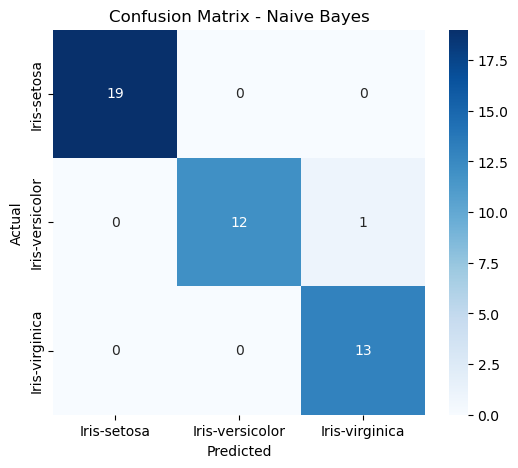

In [16]:
# 📌 Step 9: Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()